<a href="https://colab.research.google.com/github/imanhamid/selectionscan_NN/blob/master/segmentation_two_strong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 9.1MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 1.0MB 23.5MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 194kB 51.9MB/s 
     |████████████████████████████████| 40kB 7.5MB/s 
     |████████████████████████████████| 92kB 13.3MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 2.6MB 55.3MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

In [3]:
from fastai.vision.all import *

In [4]:
import fastai; fastai.__version__

'2.0.15'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [6]:
path = Path(base_dir + 'data/segmentation/two-strong/')

In [7]:
path_lbl = path/'labels'
path_img = path/'images'
fnames = get_image_files(path_img)
lbl_names = get_image_files(path_lbl)

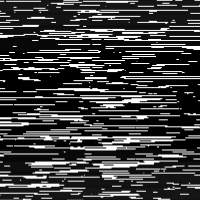

In [8]:
img_f = fnames[100]
img = Image.open(img_f)
img

In [9]:
def get_y_fn(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

print(get_y_fn(img_f))

/content/gdrive/My Drive/fastai-v3/data/segmentation/two-strong/labels/two-strong_seed-200_ancestry_P.png


In [10]:
??IntToFloatTensor

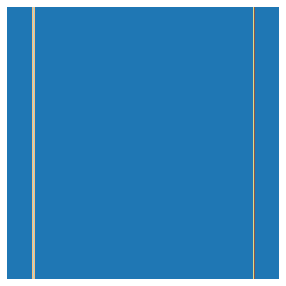

In [11]:
mask = OpenMask(get_y_fn(img_f))
mask.show(alpha=1)

In [12]:
torch.set_printoptions(profile="full")
print(mask.getcolors())

[(39600, 0), (400, 255)]


In [13]:
codes = np.array(['neutral', 'sweep'], dtype=str)

In [14]:
def MaskBlock(codes=None):
    "A `TransformBlock` for segmentation masks, potentially with `codes`"
    return TransformBlock(type_tfms=PILMask.create, item_tfms=AddMaskCodes(codes=codes), 
                          batch_tfms=IntToFloatTensor(div_mask=255))

In [15]:
dbs = DataBlock(blocks=(ImageBlock, MaskBlock(codes,)),
                   get_items = get_image_files,
                   get_y = get_y_fn,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [16]:
dls = dbs.dataloaders(path_img, path=path, bs=8)

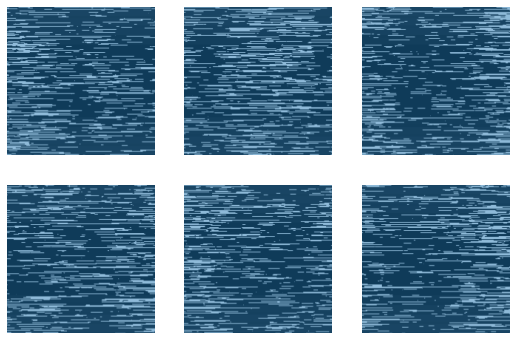

In [17]:
dls.show_batch(max_n=6)

In [18]:
learn = unet_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(axis=1, 
                    weight=torch.tensor([0.5,1.]).cuda()))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [19]:
learn.fine_tune(20, base_lr=3e-5, freeze_epochs=10,pct_start=0.9, wd=1e-2)

epoch,train_loss,valid_loss,time
0,0.295515,0.144364,07:41
1,0.139110,0.107439,00:23
2,0.101220,0.091522,00:23
3,0.086981,0.083192,00:23
4,0.079835,0.078610,00:23
5,0.075479,0.075234,00:23
6,0.071957,0.074273,00:23
7,0.068480,0.073130,00:23
8,0.065771,0.074238,00:23
9,0.062083,0.073554,00:23


epoch,train_loss,valid_loss,time
0,0.055687,0.080939,00:24
1,0.054427,0.086648,00:24
2,0.053394,0.088201,00:24
3,0.052528,0.090425,00:24
4,0.051310,0.093946,00:24
5,0.050303,0.096493,00:24
6,0.049184,0.103933,00:24
7,0.048400,0.096022,00:24
8,0.047160,0.112474,00:24
9,0.046081,0.107067,00:24


In [20]:
interp = Interpretation.from_learner(learn)

In [23]:
interp.decoded[85], interp.preds[85][0][0], interp.targs[85][0]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
learn.fit_one_cycle(8, lr_max=3e-5)

epoch,train_loss,valid_loss,time
0,0.290650,0.112700,00:33
1,0.114880,0.086982,00:32
2,0.084083,0.078218,00:32
3,0.075545,0.076094,00:33
4,0.071648,0.073297,00:32
5,0.068292,0.073885,00:33
6,0.066364,0.072514,00:32
7,0.065225,0.073137,00:33


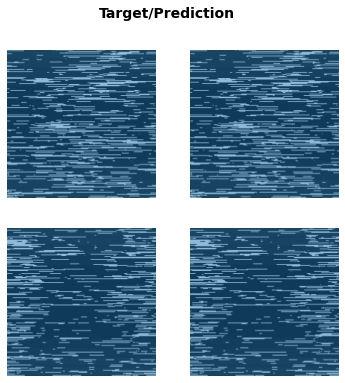

In [49]:
learn.show_results(max_n=6)

In [50]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.decoded[30], interp.preds[30][0][0], interp.targs[30][0]

In [30]:
predictions = interp.decoded

In [ ]:
pred_sums

In [34]:
pred_sums = []

for i in predictions:
  pred_colsum = i.sum(dim=0)
  pred_sums.append(pred_colsum)

In [36]:
target = interp.targs

In [38]:
targ_sums = []

for i in target:
  targ_colsum = i.sum(dim=0)
  targ_sums.append(targ_colsum)

In [ ]:
targ_sums

In [40]:
import numpy as np
import pandas as pd

pred_sums_np = np.asarray([to_np(i) for i in pred_sums])
pred_sums_df = pd.DataFrame(pred_sums_np)

targ_sums_np = np.asarray([to_np(i) for i in targ_sums])
targ_sums_df = pd.DataFrame(targ_sums_np)

In [43]:
pred_sums_df.to_csv("/content/gdrive/My Drive/fastai-v3/data/pred_sums_two-strong.txt", sep="\t")
targ_sums_df.to_csv("/content/gdrive/My Drive/fastai-v3/data/target_sums_two-strong.txt", sep="\t")

In [57]:
learn.fit_one_cycle(10, wd=1e-2, lr = slice(3e-5))

epoch,train_loss,valid_loss,time
0,0.070191,0.070655,00:33
1,0.068913,0.066808,00:32
2,0.064677,0.069051,00:32
3,0.059275,0.065077,00:32
4,0.054335,0.075658,00:32
5,0.047732,0.089400,00:32
6,0.040905,0.104344,00:32
7,0.035691,0.095544,00:32
8,0.028152,0.143549,00:32
9,0.021138,0.184617,00:32


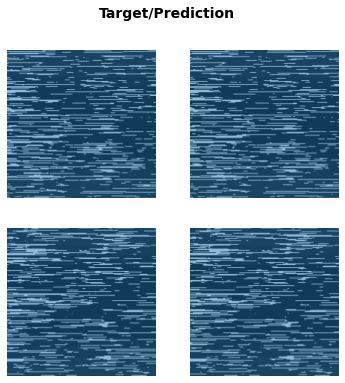

In [58]:
learn.show_results(max_n=6)

In [59]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp.decoded[85], interp.preds[85][0][0], interp.targs[85][0]

In [62]:
learn.fit_one_cycle(50, wd=1e-2, lr = slice(3e-5))

epoch,train_loss,valid_loss,time
0,0.018115,0.198244,00:32
1,0.016507,0.197410,00:32
2,0.017658,0.193658,00:32
3,0.021372,0.189564,00:32
4,0.025186,0.191485,00:32
5,0.028251,0.162124,00:32
6,0.032047,0.107380,00:32
7,0.032352,0.111477,00:32
8,0.034196,0.180579,00:32
9,0.034425,0.081322,00:32


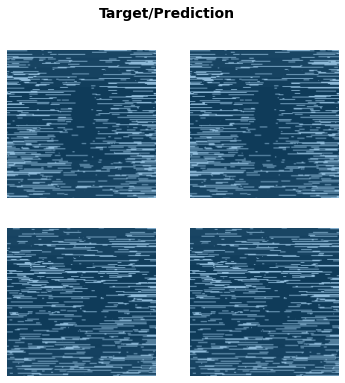

In [63]:
learn.show_results(max_n=6)

In [64]:
interp = Interpretation.from_learner(learn)

In [65]:
interp.decoded[85], interp.preds[85][0][0], interp.targs[85][0]

(tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,